<div class='alert alert-info'>
    <h1 align="center">Hierarchical Culstering</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

# Introduction

It is a method of cluster analysis that seeks to build a hierarchy of clusters. It's an unsupervised learning technique that groups similar items into clusters based on their features or characteristics. The result is a tree-like structure called a dendrogram, which shows the arrangement of the clusters.

The algorithm iteratively merges or splits clusters based on their similarity or dissimilarity. Agglomerative (Bottom-Up) approach starts with each data point as a separate cluster and then merges the closest pairs of clusters at each step until only one cluster remains. However, Divisive (Top-Down) approach starts with all data points in a single cluster and then recursively splits the cluster into smaller clusters until each data point is in its own cluster.

# Hiearchical Clustering vs K-means Clustering

Hierarchical clustering and k-means clustering are both popular methods for clustering analysis, but they have some key differences:

1. **Nature of Clusters**:
   - Hierarchical clustering produces a hierarchical structure of clusters, represented by a dendrogram. It doesn't require specifying the number of clusters beforehand and allows for the exploration of nested or overlapping clusters.
   - K-means clustering aims to partition the data into a pre-defined number of non-overlapping clusters. The number of clusters (k) needs to be specified before running the algorithm.

2. **Algorithm**:
   - Hierarchical clustering can be either agglomerative (bottom-up) or divisive (top-down). In agglomerative hierarchical clustering, each data point starts in its cluster, and pairs of clusters are iteratively merged based on their similarity. In divisive hierarchical clustering, all data points begin in one cluster, which is then recursively split into smaller clusters.
   - K-means clustering is an iterative optimization algorithm. It starts with randomly initialized cluster centroids and assigns each data point to the nearest centroid. Then, it updates the centroids based on the mean of the data points assigned to each cluster. This process continues until convergence.

3. **Computational Complexity**:
   - Hierarchical clustering can be computationally expensive, especially for large datasets, as it requires storing and updating the proximity matrix at each step.
   - K-means is computationally efficient and often faster than hierarchical clustering, especially for large datasets.

4. **Interpretability**:
   - Hierarchical clustering provides a clear visualization of the clustering structure through dendrograms, making it easy to interpret and understand the relationships between clusters.
   - k-means clustering is simpler and more straightforward to implement, but the interpretation of the results may not be as intuitive as hierarchical clustering, especially when dealing with higher-dimensional data.

5. **Cluster Shape and Size**:
   - Hierarchical clustering can handle clusters of arbitrary shapes and sizes, as it does not assume any specific cluster shape.
   - K-means clustering works best when clusters are spherical and isotropic, making it less effective for clusters with complex shapes or uneven sizes.

The choice between hierarchical clustering and k-means clustering depends on factors such as the dataset size, the desired cluster structure, the interpretability of results, and computational considerations. Hierarchical clustering is more flexible and provides a detailed hierarchical view of the data, while k-means clustering is faster and more scalable, making it suitable for large datasets with a pre-defined number of clusters.

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Let's build the model based on the Customer dataset that you can download it [here](https://www.kaggle.com/datasets/shrutimechlearn/customer-data). We need to read the data from the csv file.

In [2]:
path_to_file = 'shopping data.csv'
df = pd.read_csv(path_to_file)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The output of `df.info()` provides valuable information about the structure and contents of the DataFrame, including the number of rows and columns, the data types of columns, and the presence of missing values.

The DataFrame has 200 rows, ranging from 0 to 199. All columns have 200 non-null values, indicating that there are no missing values in the DataFrame. The columns `CustomerID`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` are of type `int64`, which represents integer values, while the column `Genre` is of type `object`, which typically represents strings or mixed types.

# Exploratory Data Analysis

EDA plays a crucial role in preparing data for clustering analysis and gaining insights into the underlying patterns and structures of the dataset. Here are some techniques and their relevance in clustering:

1. **Feature Distribution Analysis**:
   - **Histograms and Density Plots**: Visualize the distributions of numerical features to assess their spread, skewness, and potential clusters. Understanding feature distributions helps in identifying natural groupings and determining the number of clusters.
   - **Bar Charts for Categorical Features**: Examine the frequency distributions of categorical features to understand the composition of different groups within the dataset.

2. **Correlation Analysis**:
   - **Correlation Matrix**: Calculate and visualize the correlation between numerical features. Highly correlated features may have redundant information and can be considered for feature selection or dimensionality reduction.
   - **Pair Plots**: Plot pairwise scatter plots of numerical features to visualize relationships and potential clusters. Strong correlations or patterns between pairs of features may indicate meaningful clusters.

3. **Outlier Detection**:
   - **Box Plots and Scatter Plots**: Identify outliers and anomalies in the data that may affect clustering results. Outliers can disrupt the formation of clusters or represent distinct groups that require separate treatment.
   - **Statistical Methods**: Use statistical techniques such as z-score to detect outliers and understand their impact on clustering.

4. **Dimensionality Reduction**:
   - **PCA (Principal Component Analysis)**: Apply PCA to reduce the dimensionality of the dataset while preserving its essential structure. Visualize the principal components to identify dominant patterns and potential clusters.

5. **Visualization Techniques**:
   - **Scatter Plots and Pair Plots**: Visualize the data in two or three dimensions to explore potential clusters and understand their distribution.
   - **Heatmaps**: Create heatmaps to visualize relationships and similarities between data points or features, providing insights into potential clusters or subgroups.

## Apply OneHotEncoder to the categorical column in the data frame 

In [4]:
# identify categorical columns
categorical_cols = ['Genre']

# initialize OneHotEncoder
encoder = OneHotEncoder(drop='first')

# fit and transform the categorical columns
encoded_cols = encoder.fit_transform(df[categorical_cols])

# convert the encoded columns to a DataFrame
df2 = pd.DataFrame(encoded_cols.toarray(),
                   columns=encoder.get_feature_names_out(categorical_cols))

# concatenate the encoded DataFrame with the original DataFrame
df2 = pd.concat([df, df2], axis=1)

# drop the original categorical columns
df2.drop(columns=categorical_cols, inplace=True)

df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1.0
1,2,21,15,81,1.0
2,3,20,16,6,0.0
3,4,23,16,77,0.0
4,5,31,17,40,0.0


## Symmary statistics
Let's see summary statistics for numerical columns in the DataFrame.

In [5]:
# dropping CustomerID column from data 
df2 = df2.drop('CustomerID', axis=1)

df2.describe().T  # use '.T' to display statistics as rows instead of columns

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0
Genre_Male,200.0,0.44,0.497633,0.0,0.00,0.0,1.0,1.0


## Histograms

Histograms can assist in determining the optimal number of clusters by revealing natural peaks or modes in the distribution of feature values. Peaks in histograms may correspond to potential cluster centers, and identifying these peaks can guide the selection of the number of clusters. Histograms can aid in feature selection by highlighting features that exhibit significant variations or distinct clusters. Features with narrow or uniform distributions may not contribute much to clustering and can be considered for removal or further analysis.

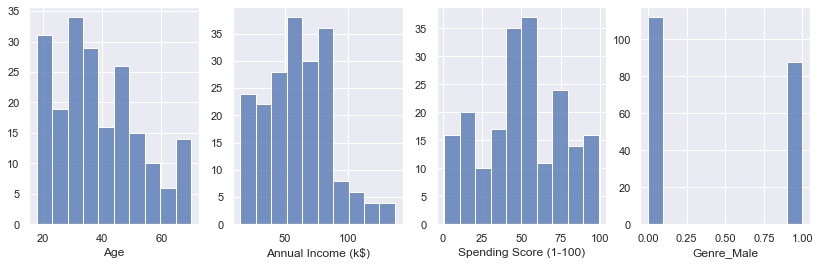

In [6]:
# create a figure and a set of subplots
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# plot a histogram for each feature in a subplot
for i, feature in enumerate(df2.columns):
    
    g = sns.histplot(data=df2, x=df2[feature], ax=axes[i], bins=10)
    g.set_ylabel("")
      
plt.show()

## Correlation matrix

In [7]:
cor_matrix = df2.corr()
cor_matrix

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Genre_Male,0.060867,0.056410,-0.058109,1.000000


The correlation matrix provides insight into the linear relationship between pairs of variables.

- When two variables have a positive correlation coefficient, it indicates that they tend to increase together. In this matrix, there's a positive correlation between "Annual Income (k$)" and "Genre_Male" (0.056), albeit weak. It suggests that as the annual income increases, the likelihood of being male also slightly increases.

- A negative correlation coefficient close to -1 suggests that as one variable increases, the other tends to decrease. For instance, there's a negative correlation between "Age" and "Spending Score (1-100)" (-0.327), indicating that younger individuals tend to have higher spending scores.

- Correlation coefficients close to 0 indicate a weak linear relationship between variables. For example, "Annual Income (k$)" and "Spending Score (1-100)" have a correlation coefficient of 0.009, suggesting a weak relationship between them.

Understanding these correlations can help identify potential clusters or patterns in the data. For instance, if certain variables are highly correlated, they might contribute similarly to the clustering process and may not offer much additional information. Conversely, variables with low correlation may provide complementary information and help differentiate clusters.

## Pair plots
Strong correlations or patterns between pairs of features may indicate meaningful clusters. By plotting different pairs of variables against each other, you may notice distinct groupings or patterns that suggest the presence of clusters. They can help in identifying outliers, which can significantly impact clustering results. Also, they can reveal potential data preprocessing steps needed before clustering, such as scaling or transformation. For example, if variables have different scales, it may be necessary to standardize them before clustering to ensure fair comparisons.

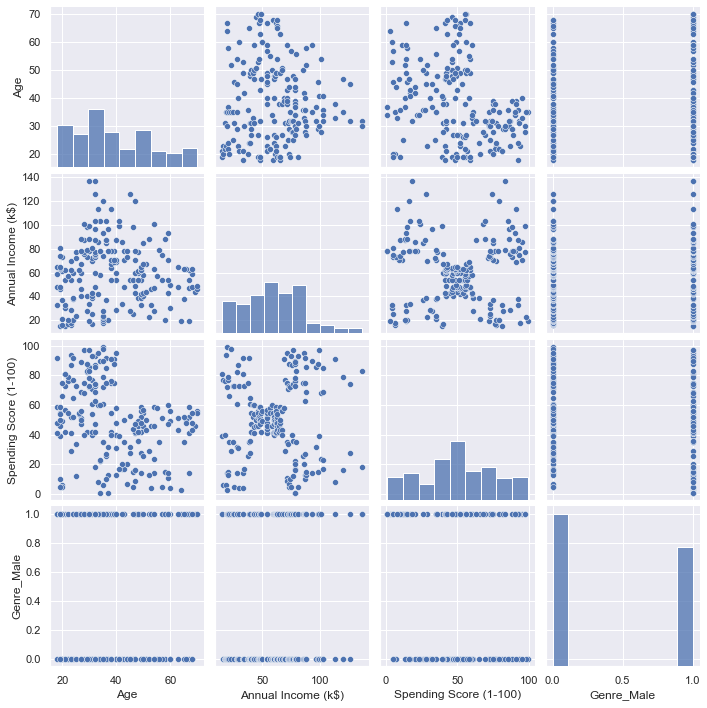

In [8]:
sns.pairplot(df2);

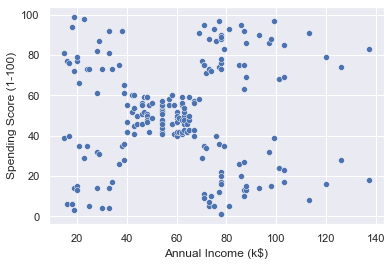

In [9]:
sns.scatterplot(x=df2['Annual Income (k$)'], y=df2['Spending Score (1-100)']);

# Dendrogram

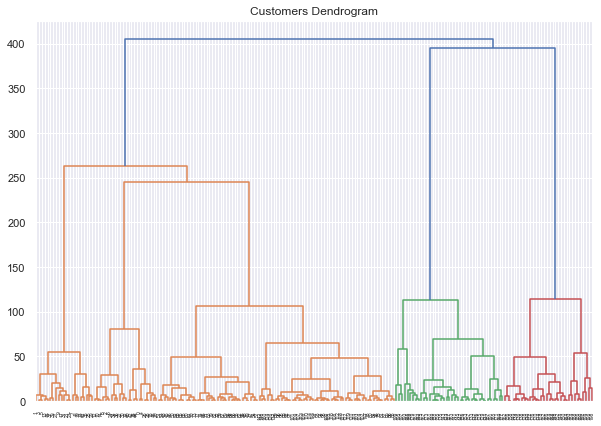

In [10]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# select the features for clustering (Annual Income and Spending Scores)
selected_data = df2.iloc[:, 1:3]

# perform hierarchical clustering using Ward's method and Euclidean distance
clusters = shc.linkage(selected_data, method='ward', metric='euclidean')

# plot the dendrogram
shc.dendrogram(Z=clusters)
plt.show()

To find the number of clusters by looking at a dendrogram, you typically look for significant jumps or changes in the vertical lines (heights) of the dendrogram. These jumps indicate the distances at which clusters are merged during the hierarchical clustering process. The greater the jump in height, the more dissimilar the clusters being merged. In this example, 5 seems a good indication of the number of clusters that have the most distance between them.

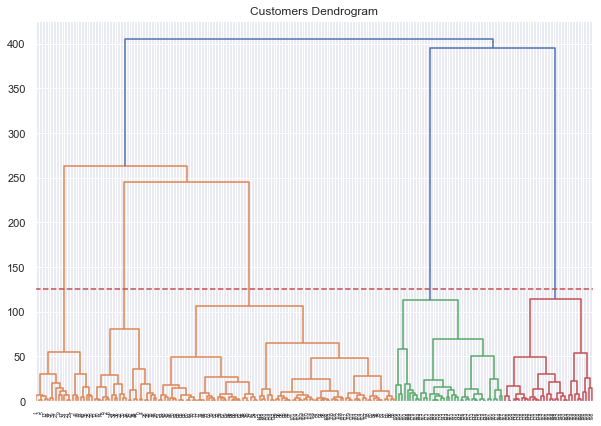

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# plot the dendrogram
shc.dendrogram(Z=clusters)

# draw a horizontal line at a reasonable height to identify number of clusters
plt.axhline(y=125, color='r', linestyle='--')

plt.show()

## Using scipy to partition data into 5 clusters

The `cut_tree` method in hierarchical clustering, provided by `scipy.cluster.hierarchy`, is used to cut the hierarchical clustering tree at a specified number of clusters and assign each observation to one of these clusters.

In [12]:
# cut the hierarchical clustering tree into 5 clusters
labels = shc.cut_tree(clusters, n_clusters=5).T
labels = labels.reshape(-1,)
labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

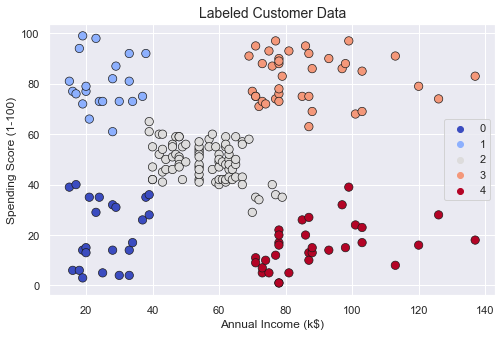

In [13]:
plt.figure(figsize=(8,5))

# plot data points with cluster labels
g = sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=selected_data, s=70,
                hue=labels, edgecolor='k',
                palette=plt.cm.coolwarm)

g.set_title('Labeled Customer Data', fontsize=14)

plt.show()

## Using scikit-learn to partition data into 5 clusters

In [14]:
# instantiate AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=5,
                                           affinity='euclidean',
                                           linkage='ward')

# fit the clustering model to the selected data
clustering_model.fit(selected_data)

# retrieve the cluster labels assigned to each data point
labels = clustering_model.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

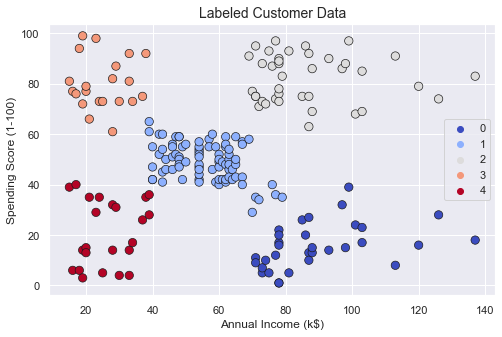

In [15]:
plt.figure(figsize=(8,5))

# plot data points with cluster labels
g = sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=selected_data, s=70,
                hue=labels, edgecolor='k',
                palette=plt.cm.coolwarm)

g.set_title('Labeled Customer Data', fontsize=14)

plt.show()

* The data points in the bottom right (label: 0) belong to the customers with high salaries but low spending. These are the customers that spend their money carefully.

* Similarly, the customers at the top right (label: 2), are the customers with high salaries and high spending. These are the type of customers that companies target.

* The customers in the middle (label: 1) are the ones with average income and average spending. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers.

* The customers in the bottom left (label: 4) are the customers that have low salaries and low spending, they might be attracted by offering promotions.

* And finally, the customers in the upper left (label: 3) are the ones with high income and low spending, which are ideally targeted by marketing.

## Types of Linkage in Hierarchical Clustering

The choice of linkage method depends on the characteristics of the dataset and the desired properties of the resulting clusters. `Ward` linkage is often a good default choice due to its ability to produce balanced clusters, while other methods may be preferred for specific scenarios such as handling noise or outliers.

1. **Ward Linkage:** 
     - Minimizes the variance when merging clusters.
     - Computes the distance between clusters based on the increase in the variance when the clusters are merged.
     - Tends to produce more balanced clusters in terms of size.
     - Computationally more expensive than other methods.
     - Works well with data where clusters have varying sizes and densities.
     - Preferred when aiming for clusters of similar sizes.

2. **Complete Linkage:**
     - Computes the distance between clusters by considering the maximum distance between any pair of points in the two clusters.
     - This method tends to produce compact clusters with distinct boundaries.
     - Less susceptible to the chaining effect (where clusters are elongated).
     - Tends to produce clusters with uneven sizes.
     - Suitable for data where clusters have distinct boundaries.

3. **Average Linkage:**
     - Computes the distance between clusters by averaging the distances between all pairs of points in the two clusters. 
     - Less sensitive to outliers compared to single linkage.
     - More robust to noise.
     - Tends to produce clusters with similar sizes and shapes.
     - Suitable for datasets with noise and outliers.

4. **Single Linkage:**
     - Computes the distance between clusters by considering the minimum distance between any pair of points in the two clusters.
     - Not robust to noisy data.

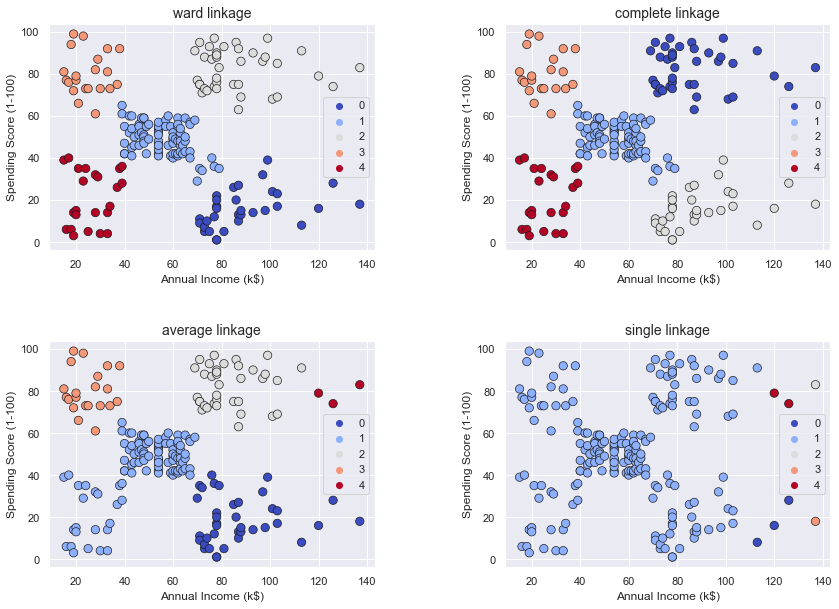

In [16]:
# define the linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# iterate over each linkage method
for i, linkage in enumerate(linkage_methods):
    
    # instantiate AgglomerativeClustering
    clustering_model = AgglomerativeClustering(n_clusters=5,
                                               affinity='euclidean',
                                               linkage=linkage)
    
    # fit the clustering model to the selected data
    clustering_model.fit(selected_data)
    
    # retrieve the cluster labels assigned to each data point
    labels = clustering_model.labels_
    
    # plot data points with cluster labels
    sns.scatterplot(x='Annual Income (k$)', 
                    y='Spending Score (1-100)', 
                    data=selected_data, s=70,
                    hue=labels, edgecolor='k',
                    palette=plt.cm.coolwarm, ax=axes[i])
    
    axes[i].set_title('%s linkage' %linkage, fontsize=14)

# add space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
plt.show()

## Different linkage type of different shapes of clusters

In [17]:
from sklearn.datasets import make_circles, make_blobs, make_moons

In [18]:
X1, _ = make_circles(n_samples=100, noise=0.1, factor=.3, random_state=0)
X2, _ = make_blobs(n_samples=100, cluster_std=.2, centers=2, random_state=5)
X3, _ = make_moons(n_samples=100, noise=0.1, random_state=1)

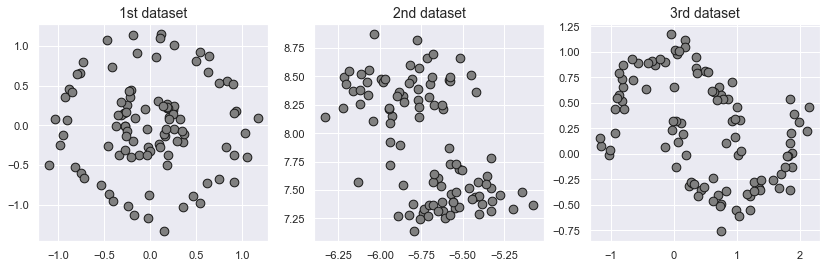

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(X1[:, 0], X1[:, 1], c='gray', s=75, edgecolor='k')
plt.title('1st dataset', fontsize=14)

plt.subplot(1,3,2)
plt.scatter(X2[:, 0], X2[:, 1], c='gray', s=75, edgecolor='k')
plt.title('2nd dataset', fontsize=14)

plt.subplot(1,3,3)
plt.scatter(X3[:, 0], X3[:, 1], c='gray', s=75, edgecolor='k')
plt.title('3rd dataset', fontsize=14)

plt.show()

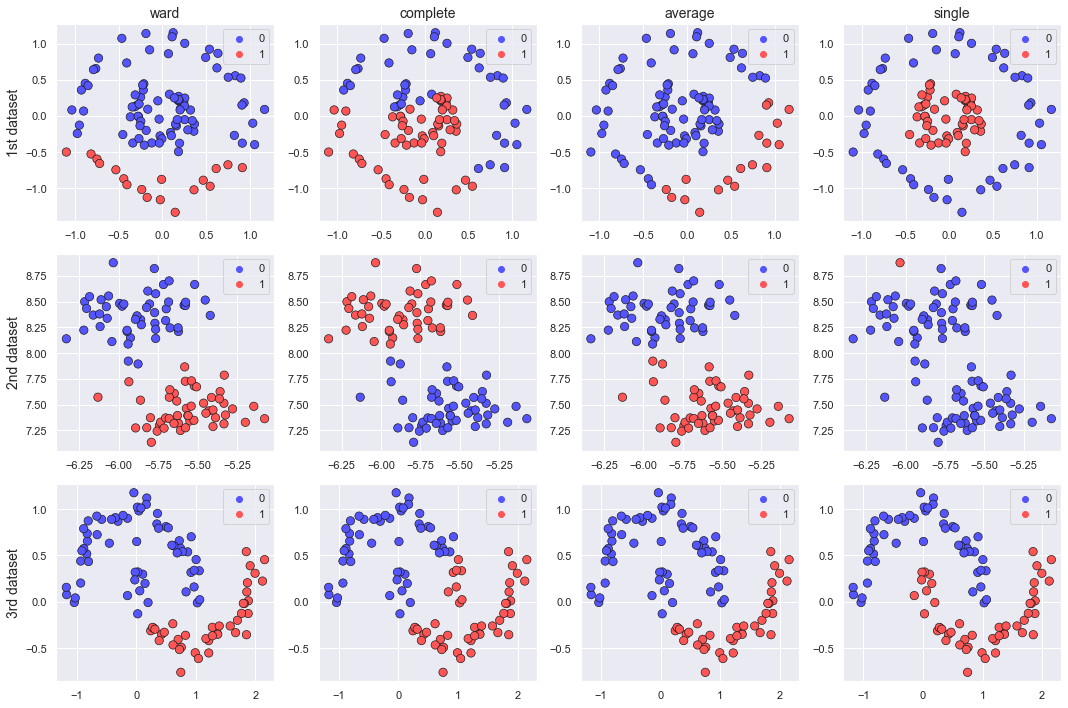

In [21]:
# datasets
datasets = {'1st dataset': X1, '2nd dataset': X2, '3rd dataset': X3}

# define the linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# create subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# set titles for the first column with dataset names
for i, dataset_name in enumerate(datasets.keys()):
    axes[i, 0].set_ylabel(dataset_name, rotation=90, fontsize=14)

# set titles for the first row with linkage methods
for j, linkage in enumerate(linkage_methods):
    axes[0, j].set_title(linkage, fontsize=14)

for i, data in enumerate(datasets.values()):
    for j, linkage in enumerate(linkage_methods):
                
        # instantiate AgglomerativeClustering
        clustering_model = AgglomerativeClustering(n_clusters=2,
                                                   affinity='euclidean',
                                                   linkage=linkage)

        # fit the clustering model to the selected data
        clustering_model.fit(data)

        # retrieve the cluster labels assigned to each data point
        labels = clustering_model.labels_
        
        ax = axes[i, j]
        
        # plot data points with cluster labels
        sns.scatterplot(x=data[:,0], 
                        y=data[:,1], s=70,
                        hue=labels, edgecolor='k',
                        palette='seismic', ax=ax)

plt.tight_layout()
plt.show()